In [1]:
import tensorflow as tf


In [2]:
tf.enable_eager_execution()

## Layers : common sets of useful operation

* highlevel api를 이용해서 쉽게 그래프를 만들 수 있고
* tensorflow 에는 keras api를 포함하고 있다. [KERAS](https://keras.io/)

In [3]:
layer = tf.keras.layers.Dense(100)
print(layer)

layer = tf.keras.layers.Dense(10, input_shape = (None , 5) , kernel_initializer='VarianceScaling' )
print(layer)

* Dense(fully connected layer)
* Conv2D
* LSTM
* BatchNormalization
* Dropout
* ...

In [4]:
layer(tf.zeros([7,5]))

<tf.Tensor: id=30, shape=(7, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

weight 와 bias 를 쉽게 뽑을 수 있다.

In [5]:
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.8888217 , -0.53470045, -0.29955214, -0.8848811 , -0.5981041 ,
         -0.36125448, -0.6997809 ,  0.58507246,  0.20733865,  0.2194415 ],
        [-0.35545313, -0.44151622, -0.26680893,  0.53249115,  0.4655138 ,
          0.4607633 , -0.9137804 ,  0.65199673, -0.06211837, -0.2642441 ],
        [-0.22805312,  0.24118018, -0.4732811 ,  0.41075438,  0.05155179,
          0.3824221 , -0.35395494, -0.5189187 ,  0.82083446, -0.24698256],
        [-0.01363474, -0.02513066, -0.5742108 ,  0.57371366,  0.22709303,
         -0.33356348,  0.36140713, -0.11957716,  0.55355656,  0.2974325 ],
        [ 0.04877688,  0.43516204,  0.09503474,  0.41933873,  0.16476789,
          0.5987677 ,  0.30772316,  0.15457508,  0.14290069, -0.11188325]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [6]:
import matplotlib.pyplot as plt , numpy as np

plt.hist(layer.variables[0][: ,0 ])
plt.hist(layer.variables[0][: ,1 ])

(array([2., 0., 0., 0., 0., 1., 0., 1., 0., 1.]),
 array([-0.53470045, -0.43771422, -0.34072796, -0.2437417 , -0.14675546,
        -0.04976921,  0.04721704,  0.14420329,  0.24118954,  0.33817577,
         0.43516204], dtype=float32),
 <a list of 10 Patch objects>)

In [7]:
layer.kernel

<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.8888217 , -0.53470045, -0.29955214, -0.8848811 , -0.5981041 ,
        -0.36125448, -0.6997809 ,  0.58507246,  0.20733865,  0.2194415 ],
       [-0.35545313, -0.44151622, -0.26680893,  0.53249115,  0.4655138 ,
         0.4607633 , -0.9137804 ,  0.65199673, -0.06211837, -0.2642441 ],
       [-0.22805312,  0.24118018, -0.4732811 ,  0.41075438,  0.05155179,
         0.3824221 , -0.35395494, -0.5189187 ,  0.82083446, -0.24698256],
       [-0.01363474, -0.02513066, -0.5742108 ,  0.57371366,  0.22709303,
        -0.33356348,  0.36140713, -0.11957716,  0.55355656,  0.2974325 ],
       [ 0.04877688,  0.43516204,  0.09503474,  0.41933873,  0.16476789,
         0.5987677 ,  0.30772316,  0.15457508,  0.14290069, -0.11188325]],
      dtype=float32)>

In [8]:
layer.bias

<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

# Custom layer 시행하기

* tf.keras.layers 를 이용해서 하는 것이 가장 좋은 방법이다.
* __init__ : 모든  초기화 변수
* build : 인풋 텐서와 모양과 나머지 초기화 값
* call : forward computation 하는 곳

However, the advantage of creating them in build is that it enables late variable creation based on the shape of the inputs the layer will operate on.


그러나 빌드에서 생성하는 이점은 계층이 입력 할 입력의 모양을 기반으로 늦게 변수를 만들 수 있다는 것입니다

super라는 게 아직 먼가 익숙하지가 않다 torch에서도 항상 쓰는데..
https://rednooby.tistory.com/56
부모에게 물려받은 것이기 때문에 자식에서 사용을 하려면 super를 무조건 써야한다.
굳이 자기 자신을 받으면서 하는 음...

In [9]:
class MyDenseLayer(tf.keras.layers.Layer) :
    def __init__(self, num_outputs) :
        super( MyDenseLayer , self).__init__()
        self.num_outputs = num_outputs
    
    def build(self, input_shape) :
        self.kernel = self.add_variable("kernel" , 
                                       shape = [int(input_shape[-1]) , self.num_outputs])
    
    def call(self , input) :
        return tf.matmul( input , self.kernel)
    
    
        

In [10]:
layer = MyDenseLayer(10)
print(layer(tf.zeros([10,5])))
print(layer.trainable_variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.11114895, -0.38628456,  0.04475951,  0.22907674,  0.24432003,
         0.5164297 , -0.54280853,  0.02737504,  0.58246785,  0.20515329],
       [ 0.39979666,  0.41699654, -0.17487335,  0.06389767,  0.56055623,
         0.29921663,  0.20023215,  0.5083633 ,  0.47127134,  0.33357966],
       [-0.2907082 ,  0.3436225 , -0.5915995 , -0.01680666, -0.15016487,
        -0.29097572,  0.11739177,  0.09097111,  0.33567172,  0.11192459],
       [-0.1614632 ,  0.51532763, -0.12367606, -0.20169088, -0.5507613 ,
         0.54190797,  0.34898627, -0

## Models : Composing layers 

* ex) resnet 
* 각각의 resnet 안에 residual block 이 여러개로 구성되어 있는 형태고 block 안에는 convolution 과 batch norm short cut이 된다.

In [11]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        
        x = self.conv2a(input_tensor)
        #x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        #x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        #x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)

    
block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block/conv2d/kernel:0', 'resnet_identity_block/conv2d/bias:0', 'resnet_identity_block/conv2d_1/kernel:0', 'resnet_identity_block/conv2d_1/bias:0', 'resnet_identity_block/conv2d_2/kernel:0', 'resnet_identity_block/conv2d_2/bias:0']


* InternalError: cuDNN launch failure : input shape ([1,2,3,1]) [Op:FusedBatchNorm]

* BatchNorm이 안먹어서 뺴고 하니 시행 가능

In [12]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1)),
                               #tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(2, 1, 
                                                      padding='same'),
                               #tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(3, (1, 1)),
                             # tf.keras.layers.BatchNormalization()
                             ])
my_seq(tf.zeros([1, 2, 3, 3]).gpu())

<tf.Tensor: id=272, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

## Variables 



In [13]:

# Using python state
x = tf.zeros([10, 10])
x += 2  # This is equivalent to x = x + 2, which does not mutate the original
        # value of x
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


Using **Variables** is also a way to quickly let a reader of your code know that this piece of state is mutable.


In [14]:

v = tf.Variable(1.0)
assert v.numpy() == 1.0

# Re-assign the value
v.assign(3.0)
assert v.numpy() == 3.0

# Use `v` in a TensorFlow operation like tf.square() and reassign
v.assign(tf.square(v))
assert v.numpy() == 9.0

## Linear Model Fitting Example

* Tensor , GradientType , Variable 

1. 모델정의
2. loss정의
3. training data 확보
4. 데이터를 fitting 하기위해 변수를 조정하게 optimizer를 사용해서 train data를 돌려라

## 모델 정의

In [15]:
class Model(object):
    def __init__(self) :
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self,x) :
        return self.W * x + self.b
    
model = Model()
assert model(3.0).numpy() == 15.0

## Loss 정의

In [22]:
def loss(predict , y) :
    return tf.reduce_sum( tf.square( predict - y ))


# Training data 확보하기.

In [17]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal( shape = [NUM_EXAMPLES ])
noise = tf.random_normal( shape = [NUM_EXAMPLES ])

outputs = inputs * TRUE_W + TRUE_B + noise

Current loss : 
9540.645


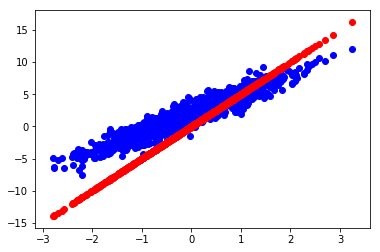

In [23]:
import matplotlib.pyplot as plt

plt.scatter(inputs , outputs , c="b")
plt.scatter( inputs , model(inputs), c="r")

print("Current loss : ")
print(loss(model(inputs), outputs).numpy())

## Define a training loop

gradinet descent 를 사용한다. 'tf.train.Optimizer'

In [24]:
def train(model , inputs , outputs , learning_rate) :
    with tf.GradientTape() as t :
        current_loss = loss(model(inputs), outputs)
        
    dW , db = t.gradient( current_loss , [model.W , model.b])
    model.W.assign_sub(learning_rate* dW)
    model.b.assign_sub(learning_rate* db)

In [25]:
model = Model()

Ws , bs = [] , []
epochs = range(10)
for epoch in epochs :
    Ws.append( model.W.numpy())
    bs.append( model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model , inputs, outputs, learning_rate= 0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))
    


Epoch  0: W=5.00 b=0.00, loss=9540.64453
Epoch  1: W=-429.63 b=413.78, loss=376660640.00000
Epoch  2: W=92034.54 b=-85386.42, loss=16647367688192.00000
Epoch  3: W=-19561272.00 b=17724396.00, loss=736180621717536768.00000
Epoch  4: W=4154361600.00 b=-3682762496.00, loss=32570861167474863243264.00000
Epoch  5: W=-881641848832.00 b=765917396992.00, loss=1441613787230164407172464640.00000
Epoch  6: W=186978280669184.00 b=-159430947635200.00, loss=63828821902683685039486391025664.00000
Epoch  7: W=-39630389089665024.00 b=33214154626039808.00, loss=2826901086415508811621145668315250688.00000
Epoch  8: W=8395139614465064960.00 b=-6924873215558811648.00, loss=inf
Epoch  9: W=-1777508285478305005568.00 b=1444832306816538902528.00, loss=inf


In [ ]:
plt.plot(epochs , Ws , "r")
plt.plot(epochs , bs, "b")
plt.plot([TRUE_W] * len(epochs) , "r--",[TRUE_B] * len(epochs) , "b--")
plt.legend(["W", "b" , "TRUE W", "TRUE B"])
plt.show()


## 다음에 진행 할 것 

https://github.com/moono/tf-eager-on-GAN/blob/master/dcgan_eager_tf_1_12.py